In [1]:
import pandas as pd
import warnings
import numpy as np
import string

# Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import re

warnings.filterwarnings("ignore")

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tristanlm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('Data/df.csv')

In [4]:
df

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [5]:
df['Polarity_Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 2 else('Negative'))

On vérifie s'il n'y a pas des anomalies dans les reviews, i.e. des produits avec des avis négatifs mais recommandés, ou l'inverse

In [6]:
df.loc[(df['Recommended IND']==1) & (df['Rating']<2)]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity_Rating
2427,2427,939,39,NaN,Beautiful jacket and i got lots of compliments...,1,1,0,General,Tops,Sweaters,Negative
2872,2872,829,51,NaN,Very cute top. i went down a size because for ...,1,1,1,General Petite,Tops,Blouses,Negative
5570,5570,861,69,Great t,I love this t-shirt because it has the combina...,1,1,0,General,Tops,Knits,Negative
6216,6216,829,53,Traditional material in a new way,Love the movement of the blouse and how it fal...,1,1,0,General,Tops,Blouses,Negative
7740,7740,872,44,Odd neckline,I loved the color and design until i tried it ...,1,1,0,General,Tops,Knits,Negative
7850,7850,956,43,NaN,"This is so close to perfect, but there's a sea...",1,1,1,General Petite,Jackets,Jackets,Negative
9877,9877,1084,58,NaN,"I loved the dress, but just not dressy enough ...",1,1,5,General Petite,Dresses,Dresses,Negative
10517,10517,1110,44,Beautiful dress; so excited to wear it!!!,I saw this dress in the catalog and had to hav...,1,1,0,General,Dresses,Dresses,Negative
13607,13607,1075,48,Great dress,Such a great dress. fit is flattering. the sma...,1,1,0,General,Dresses,Dresses,Negative
16194,16194,1081,68,NaN,This is an extremely flattering dress. i could...,1,1,1,General Petite,Dresses,Dresses,Negative


In [7]:
df.loc[(df['Recommended IND']==0) & (df['Rating']>4)]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Polarity_Rating
1333,1333,836,25,"Cute shirt, but not for me",The blue lace with the white top underneath is...,5,0,0,General,Tops,Blouses,Positive
3499,3499,872,52,Love this top!,This top is one of my retailer faves! it is so...,5,0,2,General,Tops,Knits,Positive
3863,3863,1081,53,Love this dress,"I also have this dress in 3/4 sleeve, tegan tu...",5,0,0,General Petite,Dresses,Dresses,Positive
4409,4409,1094,53,Too small and short for my age.,Very pretty but too short for my age. looks we...,5,0,0,General,Dresses,Dresses,Positive
6532,6532,1095,33,Stunning,This jumpsuit runs large so i sized down perfe...,5,0,0,General,Dresses,Dresses,Positive
7443,7443,941,64,A great long swtr w/ patch pockets!,I ordered my usual sz s during the promo. arri...,5,0,6,General,Tops,Sweaters,Positive
9161,9161,1126,82,Houndstooth,This an absolutely beautiful quality stylish c...,5,0,0,General Petite,Jackets,Outerwear,Positive
9675,9675,865,33,Love it!,I didn't realize how much i would love this. w...,5,0,0,General,Tops,Knits,Positive
9685,9685,828,47,Comfy,This shirt is like the best worn in flannel wi...,5,0,1,General,Tops,Blouses,Positive
11636,11636,939,64,Beautiful,I've wondered abt this swtr but hesitated to o...,5,0,23,General,Tops,Sweaters,Positive


On voit qu'effectivement ces avis sont incohérents. On décide de les retirer pour ne pas induire en erreur le modèle.

In [8]:
#On retire les anomalies
df = df.loc[~((df['Recommended IND']==1) & (df['Rating']<2))]
df = df.loc[~((df['Recommended IND']==0) & (df['Rating']>4))]

In [9]:
df.shape

(23445, 12)

In [10]:
df.drop(['Unnamed: 0','Clothing ID','Age','Title','Rating','Positive Feedback Count','Division Name','Department Name','Class Name','Recommended IND'],axis=1,inplace=True)

In [11]:
df

,Review Text,Polarity_Rating
0,Absolutely wonderful - silky and sexy and comf...,Positive
1,Love this dress! it's sooo pretty. i happene...,Positive
2,I had such high hopes for this dress and reall...,Positive
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive
4,This shirt is very flattering to all due to th...,Positive
...,...,...
23481,I was very happy to snag this dress at such a ...,Positive
23482,"It reminds me of maternity clothes. soft, stre...",Positive
23483,"This fit well, but the top was very see throug...",Positive
23484,I bought this dress for a wedding i have this ...,Positive


In [12]:
df.isna().sum()

Review Text        842
Polarity_Rating      0
dtype: int64

In [13]:
df.isna().mean().round(4) * 100

Review Text        3.59
Polarity_Rating    0.00
dtype: float64

Il nous manque 842 reviews. Ces observations sont inutilisable, et comme il s'agit de texte, ce n'est pas imputable. On supprime donc les observations concernées

In [14]:
df.dropna(inplace = True)

In [15]:
df.shape

(22603, 2)

<AxesSubplot:xlabel='Polarity_Rating', ylabel='count'>

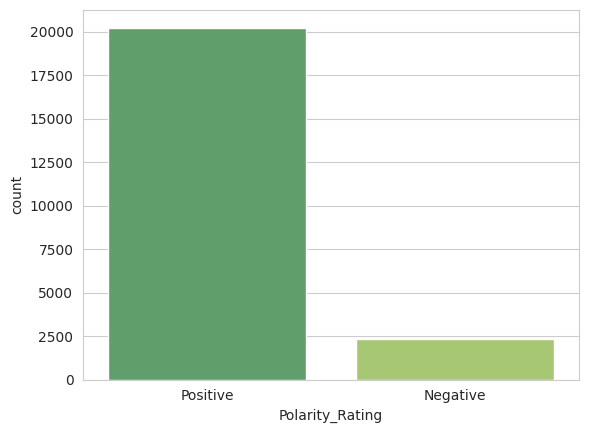

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='Polarity_Rating',data=df, palette='summer')

Nous avons un problème de balancing. Les avis négatifs et neutres sont sous-représentés. L'undersampling ne semble pas être une bonne approche car nous avons trop peu d'observations dans les classes sous-représentées. On penchera donc plutôt vers l'oversampling

## NLP

In [17]:
# Plotting wordclouds for both negative and positive reviews
stopwords = set(STOPWORDS)

On crée de nouvelles features à partir du texte pour savoir s'il est possible de distinguer un avis positif d'un avis négatif

In [18]:
df_fe = df.copy()
df_fe['length'] = df_fe['Review Text'].str.len()
df_fe['num_exclamation_marks'] = df_fe['Review Text'].str.count('\!')
df_fe['num_question_marks'] = df_fe['Review Text'].str.count('\?')
df_fe['num_punctuations'] = df_fe['Review Text'].str.count('[.,:;]')
df_fe['num_question_marks'] = df_fe['Review Text'].str.count('[*&$%]')
df_fe['num_words'] = df_fe['Review Text'].apply(lambda x: len(x.split()))
df_fe.head()

,Review Text,Polarity_Rating,length,num_exclamation_marks,num_question_marks,num_punctuations,num_words
0,Absolutely wonderful - silky and sexy and comf...,Positive,53,0,0,0,8
1,Love this dress! it's sooo pretty. i happene...,Positive,303,1,0,6,62
2,I had such high hopes for this dress and reall...,Positive,500,1,0,8,98
3,"I love, love, love this jumpsuit. it's fun, fl...",Positive,124,2,0,6,22
4,This shirt is very flattering to all due to th...,Positive,192,3,0,2,36


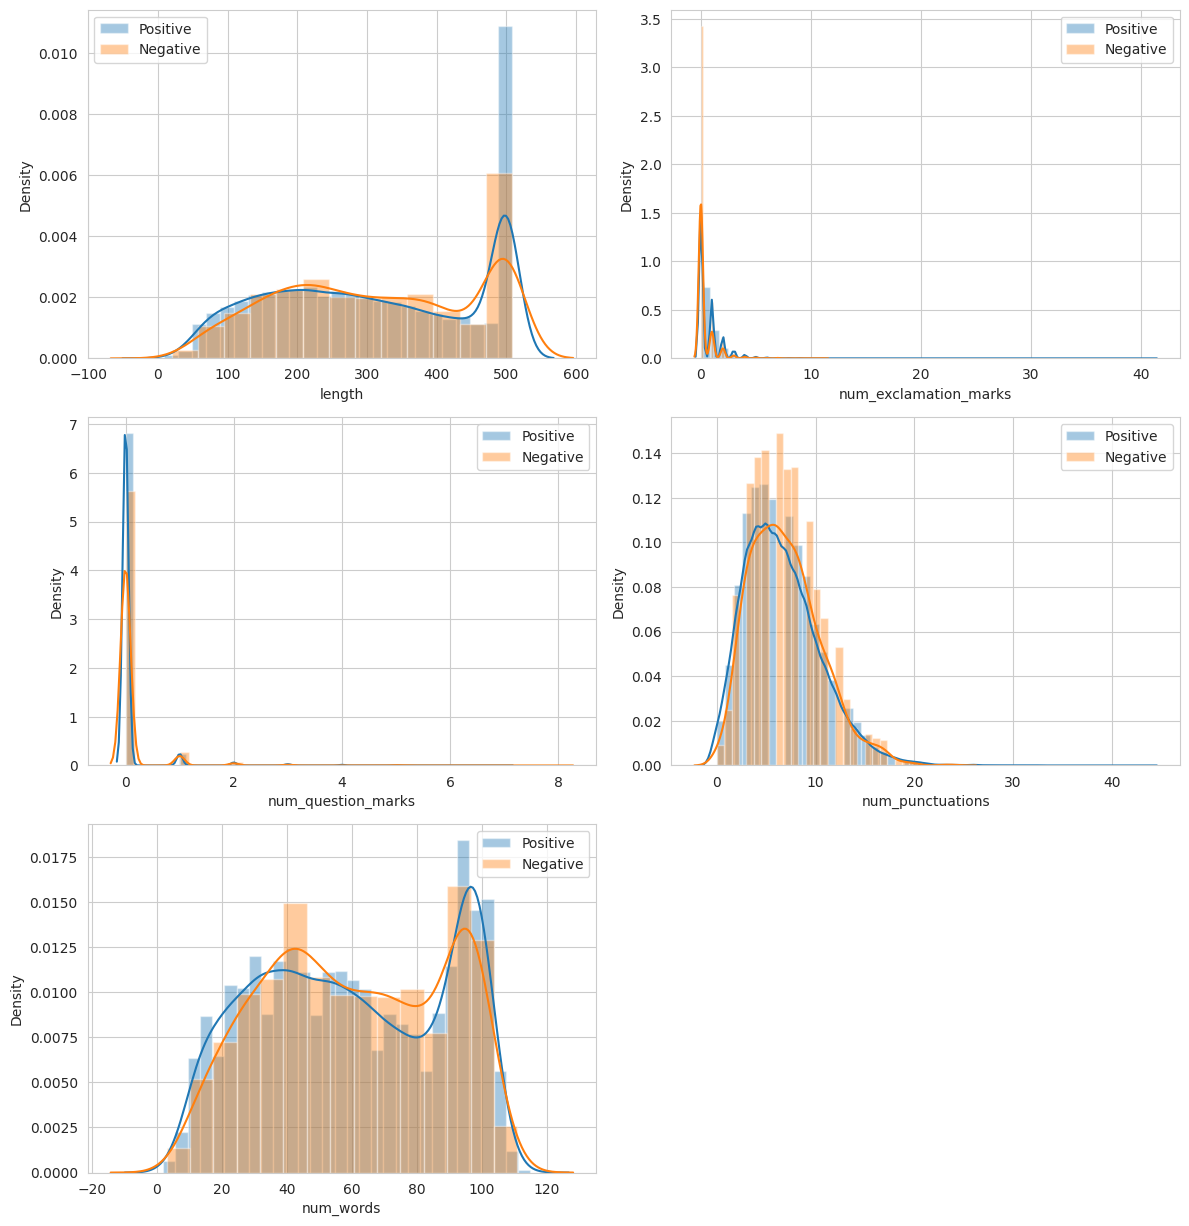

In [19]:
plt.figure(figsize=(12, 16))
features = ['length', 'num_exclamation_marks', 'num_question_marks', 
             'num_punctuations', 'num_words']
for i in range(len(features)):
    plt.subplot(4, 2, i+1)
    sns.distplot(df_fe[df_fe.Polarity_Rating=='Positive'][features[i]], label = 'Positive')
    sns.distplot(df_fe[df_fe.Polarity_Rating=='Negative'][features[i]], label = 'Negative')
    plt.legend()
plt.tight_layout()
plt.show()

On ne voit pas de différences notoires dans les distributions de ces variables. Il est tout de même possible que ces features apportent quelque chose au modèle, nous testerons cela plus tard

In [20]:
# Train-Test Splitting
X = df.drop(columns=['Polarity_Rating'])
y = df['Polarity_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18082, 1) (4521, 1) (18082,) (4521,)


In [21]:
# Function to tokenize and clean the text
def tokenize_and_clean(text):
    # Changing case of the text to lower case
    lowered = text.lower()
    
    # Tokenization
    tokens = word_tokenize(lowered)
    # r'\w{1,}' Permet de filtrer la ponctuation et les charactères spéciaux
    filtered_tokens = [token for token in tokens if re.match(r'\w{1,}' , token)]
    
    # Stemming
    stemmer = PorterStemmer()
    stems = [stemmer.stem(token) for token in filtered_tokens]
    return stems

In [22]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_clean, stop_words='english')
X_train_reviews_tfidf = tfidf_vectorizer.fit_transform(X_train['Review Text'])
X_test_reviews_tfidf = tfidf_vectorizer.transform(X_test['Review Text'])
print(X_train_reviews_tfidf.shape, X_test_reviews_tfidf.shape)

(18082, 12361) (4521, 12361)


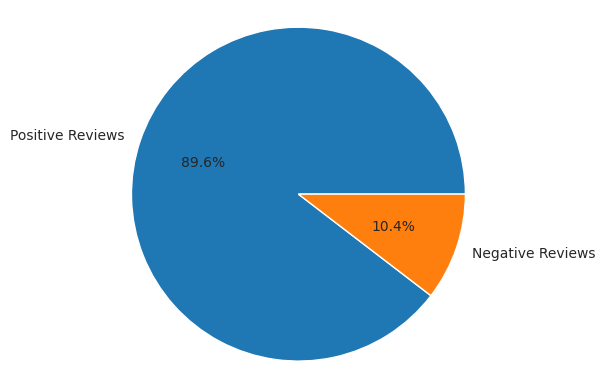

In [23]:
# Class Imbalance Check
plt.pie(y_train.value_counts(), 
        labels=['Positive Reviews', 'Negative Reviews'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

(32400, 12361) (32400,)


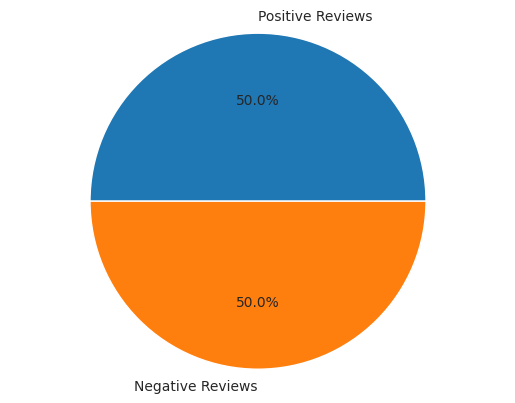

In [24]:
# SMOTE to deal with the class imbalance
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_reviews_tfidf, y_train.values)
print(X_train_smote.shape, y_train_smote.shape)


# Class Imbalance Check
plt.pie(pd.value_counts(y_train_smote), 
        labels=['Positive Reviews', 'Negative Reviews'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [25]:
# Functions to print scores
def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores: Accuracy={acc}, F1-Score={f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Validation Scores: Accuracy={acc}, F1-Score={f1}')

In [26]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
y_train_pred = lr.predict(X_train_smote)
y_test_pred = lr.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

    Negative       0.43      0.73      0.54       473
    Positive       0.97      0.89      0.92      4048

    accuracy                           0.87      4521
   macro avg       0.70      0.81      0.73      4521
weighted avg       0.91      0.87      0.88      4521



In [27]:
y_test.shape

(4521,)

In [28]:
y_test_pred.shape

(4521,)

In [29]:
y_train_pred.shape

(32400,)

In [30]:
y_train.shape

(18082,)

In [33]:
y_train_smote.shape

(32400,)

In [34]:
X_train_smote.shape

(32400, 12361)

In [35]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)
y_pred = lr.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.43      0.73      0.54       473
    Positive       0.97      0.89      0.92      4048

    accuracy                           0.87      4521
   macro avg       0.70      0.81      0.73      4521
weighted avg       0.91      0.87      0.88      4521



In [36]:
# Naive Bayes Classifier
mnb = MultinomialNB()
mnb.fit(X_train_smote, y_train_smote)
y_pred = mnb.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.37      0.78      0.51       473
    Positive       0.97      0.85      0.90      4048

    accuracy                           0.84      4521
   macro avg       0.67      0.82      0.70      4521
weighted avg       0.91      0.84      0.86      4521



In [37]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.64      0.25      0.36       473
    Positive       0.92      0.98      0.95      4048

    accuracy                           0.91      4521
   macro avg       0.78      0.62      0.65      4521
weighted avg       0.89      0.91      0.89      4521



In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train_smote)
y_test_encoded = le.fit_transform(y_test)

In [39]:
# Extreme Gradient Boosting Classifier
xgb = XGBClassifier(objective='binary:logistic', eval_metric='logloss')
xgb.fit(X_train_smote, y_train_encoded)
y_pred = xgb.predict(X_test_reviews_tfidf)
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.37      0.44       473
           1       0.93      0.97      0.95      4048

    accuracy                           0.90      4521
   macro avg       0.75      0.67      0.70      4521
weighted avg       0.89      0.90      0.89      4521



In [40]:
#tests

In [54]:
df_test=df

In [41]:
df_Positive = df[df['Polarity_Rating'] == 'Positive'][0:8000]
df_Negative = df[df['Polarity_Rating'] == 'Negative']

In [42]:
df_Negative_over = df_Negative.sample(8000, replace=True)

In [43]:
df_over = pd.concat([df_Positive, df_Negative_over], axis=0)

In [44]:
# Train-Test Splitting
X = df_over.drop(columns=['Polarity_Rating'])
y = df_over['Polarity_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12800, 1) (3200, 1) (12800,) (3200,)


In [45]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_clean, stop_words='english')
X_train_reviews_tfidf = tfidf_vectorizer.fit_transform(X_train['Review Text'])
X_test_reviews_tfidf = tfidf_vectorizer.transform(X_test['Review Text'])
print(X_train_reviews_tfidf.shape, X_test_reviews_tfidf.shape)

(12800, 8365) (3200, 8365)


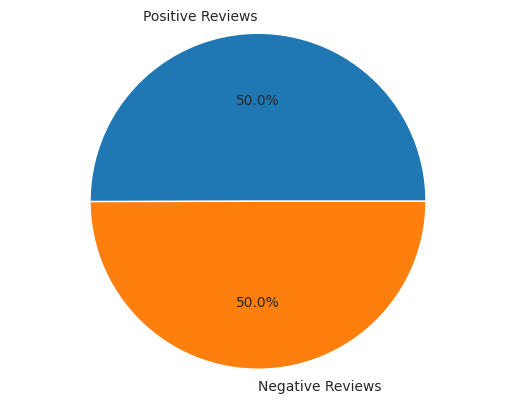

In [46]:
# Class Imbalance Check
plt.pie(y_train.value_counts(), 
        labels=['Positive Reviews', 'Negative Reviews'], 
        autopct='%0.1f%%')
plt.axis('equal')
plt.show()

In [47]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_reviews_tfidf, y_train)
y_pred = lr.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88      1596
    Positive       0.90      0.85      0.88      1604

    accuracy                           0.88      3200
   macro avg       0.88      0.88      0.88      3200
weighted avg       0.88      0.88      0.88      3200



In [48]:
y_train.shape

(12800,)

In [49]:
# Train-Test Splitting
X = df.drop(columns=['Polarity_Rating'])
y = df['Polarity_Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18082, 1) (4521, 1) (18082,) (4521,)


In [50]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize_and_clean, stop_words='english')
X_train_reviews_tfidf = tfidf_vectorizer.fit_transform(X_train['Review Text'])
X_test_reviews_tfidf = tfidf_vectorizer.transform(X_test['Review Text'])
print(X_train_reviews_tfidf.shape, X_test_reviews_tfidf.shape)

(18082, 12361) (4521, 12361)


In [ ]:
y_pred = lr.predict(X_test_reviews_tfidf)
print(classification_report(y_test, y_pred))

In [ ]:
X_test_reviews_tfidf.shape